In [27]:
# Bibliotecas
import sys, numpy as np, matplotlib.pyplot as plt, plotly.graph_objects as go, pandas as pd
sys.path.append('../ppgsi_mdp_risk')

from ppgsi_mdp_risk.function import FunctionFactory
from ppgsi_mdp_risk.curves import EquivalentCostCurve
from ppgsi_mdp_risk.graph import CurvePlots

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MDP Simples

As seguintes metodologias foram aplicadas neste ambiente:

|Metodologia|Descritivo|
|--|--|
|Exponential Utility Function||
|Piecewise-Linear||
|Polynomial Utility Function||
|VaR (Value at Risk)||
|CVaR (Conditional Value at Risk)||



## Configurações

In [94]:
# Parametros
nm_exponential_function = 'ExponentialFunction'
nm_pwl_function = 'PiecewiseTransformation'
nm_polynomial_function = 'PolynomialFunction'
_quiet = True

# Objetos ---------------------------
# -----------------------------------

# Funções
_ff = FunctionFactory.FunctionFactory()
_exp = _ff.get_function(nm_exponential_function)
_pwl = _ff.get_function(nm_pwl_function)
_poly = _ff.get_function(nm_polynomial_function)

# Cria dicionario de objetos para Calculo
_ecc = {}
_ecc[nm_exponential_function] = EquivalentCostCurve.EquivalentCostCurve(_exp, nm_exponential_function, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_pwl_function] = EquivalentCostCurve.EquivalentCostCurve(_pwl, nm_pwl_function, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_polynomial_function] = EquivalentCostCurve.EquivalentCostCurve(_poly, nm_polynomial_function, rini_p=0.05, rend_p=1, step_p=0.05)

# Plots
_cp = CurvePlots.CurvePlots(lib='matplotlib')

# Calculo Lambda Extreme
lambda_extreme = _exp._get_lambda_extreme(p, c)

# Parametros Especificos
c, p = 1, 0.5
list_p = np.arange(0.1, 1, 0.1)

list_lambdas_pos = np.arange(0.1, lambda_extreme, 0.001)
list_lambdas_neg = np.arange(-100, -0.1, 0.1)

list_k_pos = np.arange(0.9, 1, 0.00001)
list_k_neg = np.arange(-1, -0.9, 0.00001)

list_betas = [1/10**9, 0.1, 1, 2, 3, 10, 20, 50]

## Exponential Utility Function

$$
V(s) = \frac{-e^{\lambda c} \times p}{(1 - e^{\lambda c} \times (1-p))}
$$

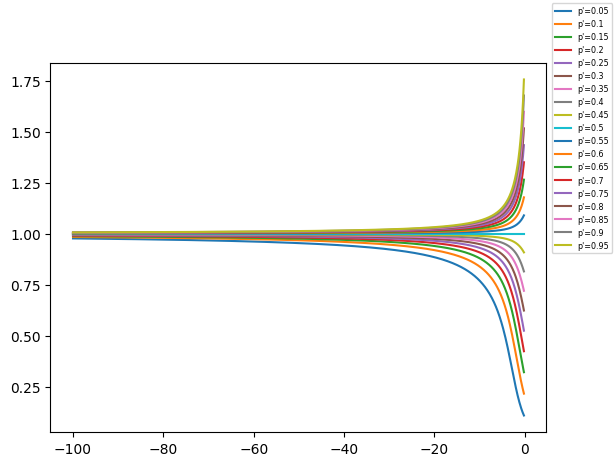

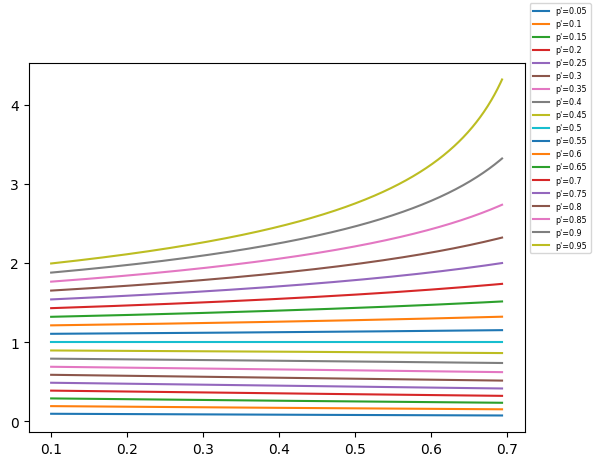

In [80]:
# Limite Empirico Minimo
dict_curves_exp = {}
min_lambda = np.min(list_lambdas_neg)

for l in list_lambdas_neg:
    dict_curves_exp[l] = _ecc[nm_exponential_function].get_empirical_limit_curve(
        c=c,
        p=p,
        l=l
    )

df_min_exp = pd.DataFrame(dict_curves_exp)
c_min_exp = df_min_exp[min_lambda]

_cp.plot_curve_from_dataframe(
    df=df_min_exp,
    label='p\'',
    transpose=True
)

# Limite Empirico max
dict_curves_exp = {}
max_lambda = np.max(list_lambdas_pos)

for l in list_lambdas_pos:
    dict_curves_exp[l] = _ecc[nm_exponential_function].get_empirical_limit_curve(
        c=c,
        p=p,
        l=l
    )

df_max_exp = pd.DataFrame(dict_curves_exp)
c_min_exp = df_max_exp[max_lambda]

_cp.plot_curve_from_dataframe(
    df=df_max_exp,
    label='p\'',
    transpose=True
)

C:\Users\Miyamura\Desktop\GIT_MESTRADO\ppgsi_comparable_mdp_risk\notebooks\../ppgsi_mdp_risk\ppgsi_mdp_risk\function\ExponentialFunction.py:17: RuntimeWarning: invalid value encountered in log
  return np.log(v1/v2) * 1/l


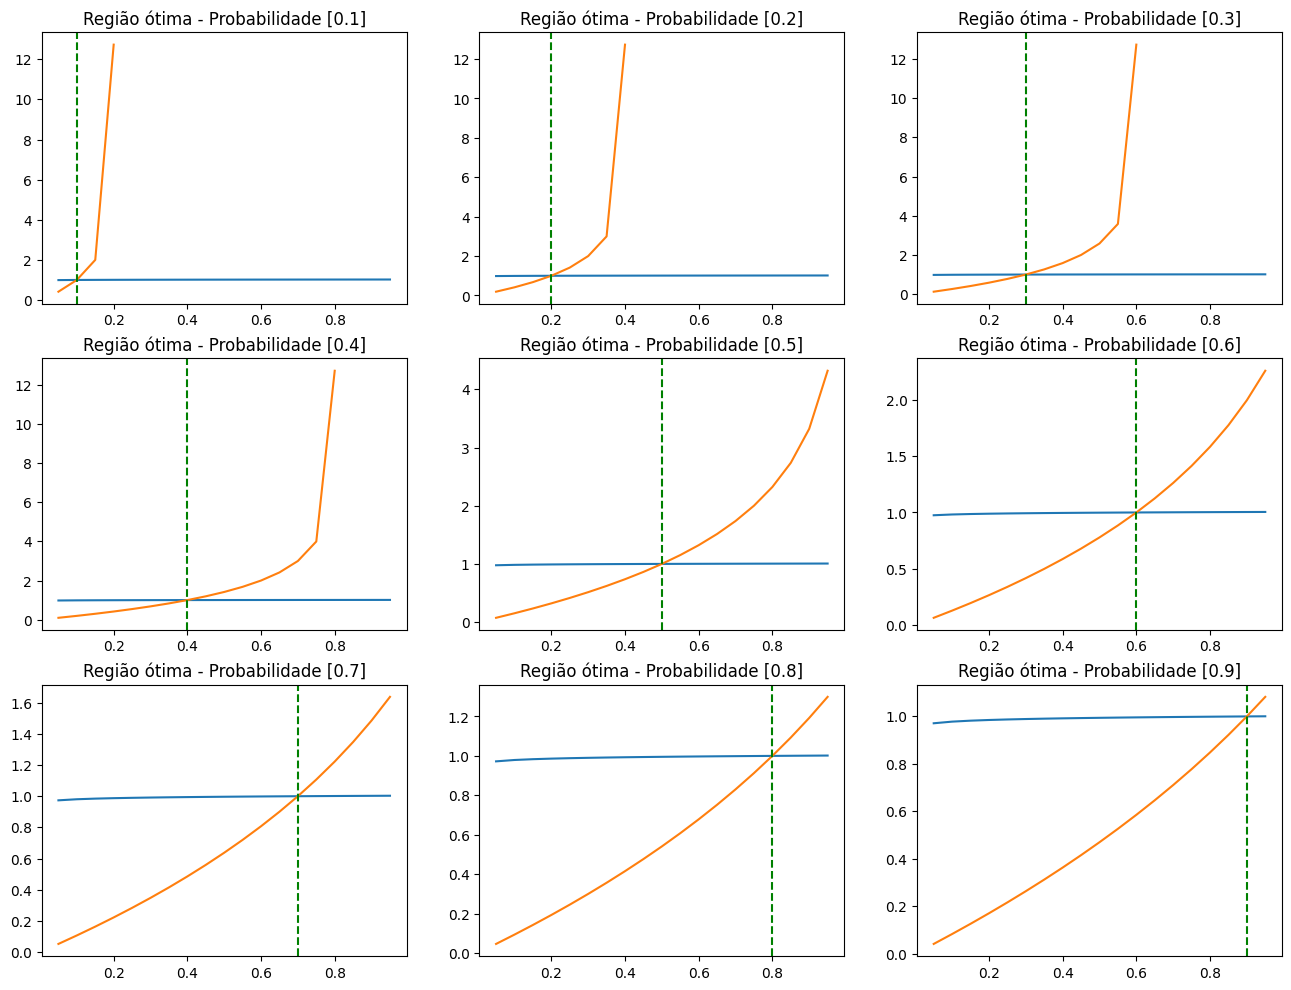

In [96]:
dict_curves = {}

min_max_lambda = [min(list_lambdas_neg), max(list_lambdas_pos)]

for l in min_max_lambda:
    if not _quiet: print(f'Processando beta={beta}')
    dict_curves[l] = _ecc[nm_exponential_function].get_multi_empirical_limit_curve(c, list_p, l=l)

_cp.plot_curve_subplots_multiple_probabilities(dict_curves, list_p) 

## Piecewise-Linear Transformation

$$
V(s) = \frac{c \times (2kp - k + 1)}{(\gamma - 1) \times (k + p - 1) + p - \gamma kp}
$$

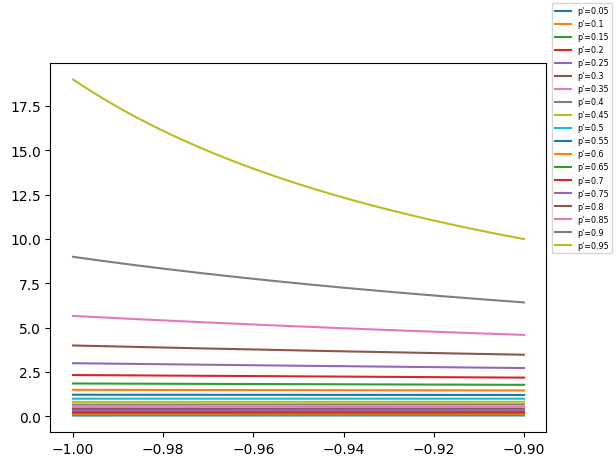

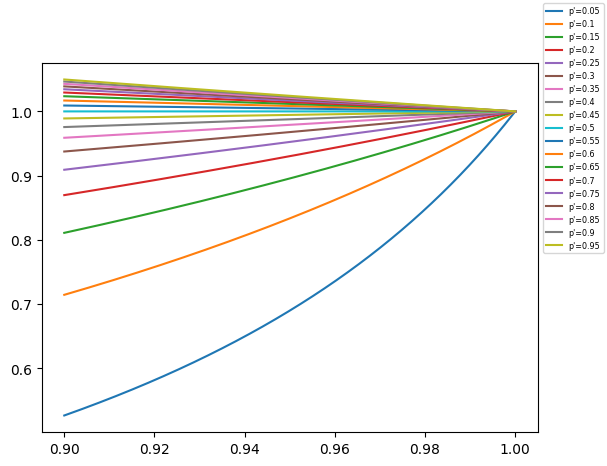

In [93]:
# Limite Empirico Minimo
dict_curves_pwl = {}
min_lambda = np.min(list_k_neg)

for k in list_k_neg:
    alpha = _pwl._get_alpha(k)
    gamma = 1
    dict_curves_pwl[k] = _ecc[nm_pwl_function].get_empirical_limit_curve(
        c=c,
        p=p,
        k=k,
        gamma=gamma,
        alpha=alpha
    )

df_min_pwl = pd.DataFrame(dict_curves_pwl)
c_min_pwl = df_min_pwl[min_lambda]

_cp.plot_curve_from_dataframe(
    df=df_min_pwl,
    label='p\'',
    transpose=True
)

# Limite Empirico max
dict_curves_pwl = {}
max_lambda = np.max(list_k_pos)

for k in list_k_pos:
    alpha = _pwl._get_alpha(k)
    gamma = 1
    dict_curves_pwl[k] = _ecc[nm_pwl_function].get_empirical_limit_curve(
        c=c,
        p=p,
        k=k,
        gamma=gamma,
        alpha=alpha
    )

df_max_pwl = pd.DataFrame(dict_curves_pwl)
c_min_pwl = df_max_pwl[max_lambda]

_cp.plot_curve_from_dataframe(
    df=df_max_pwl,
    label='p\'',
    transpose=True
)

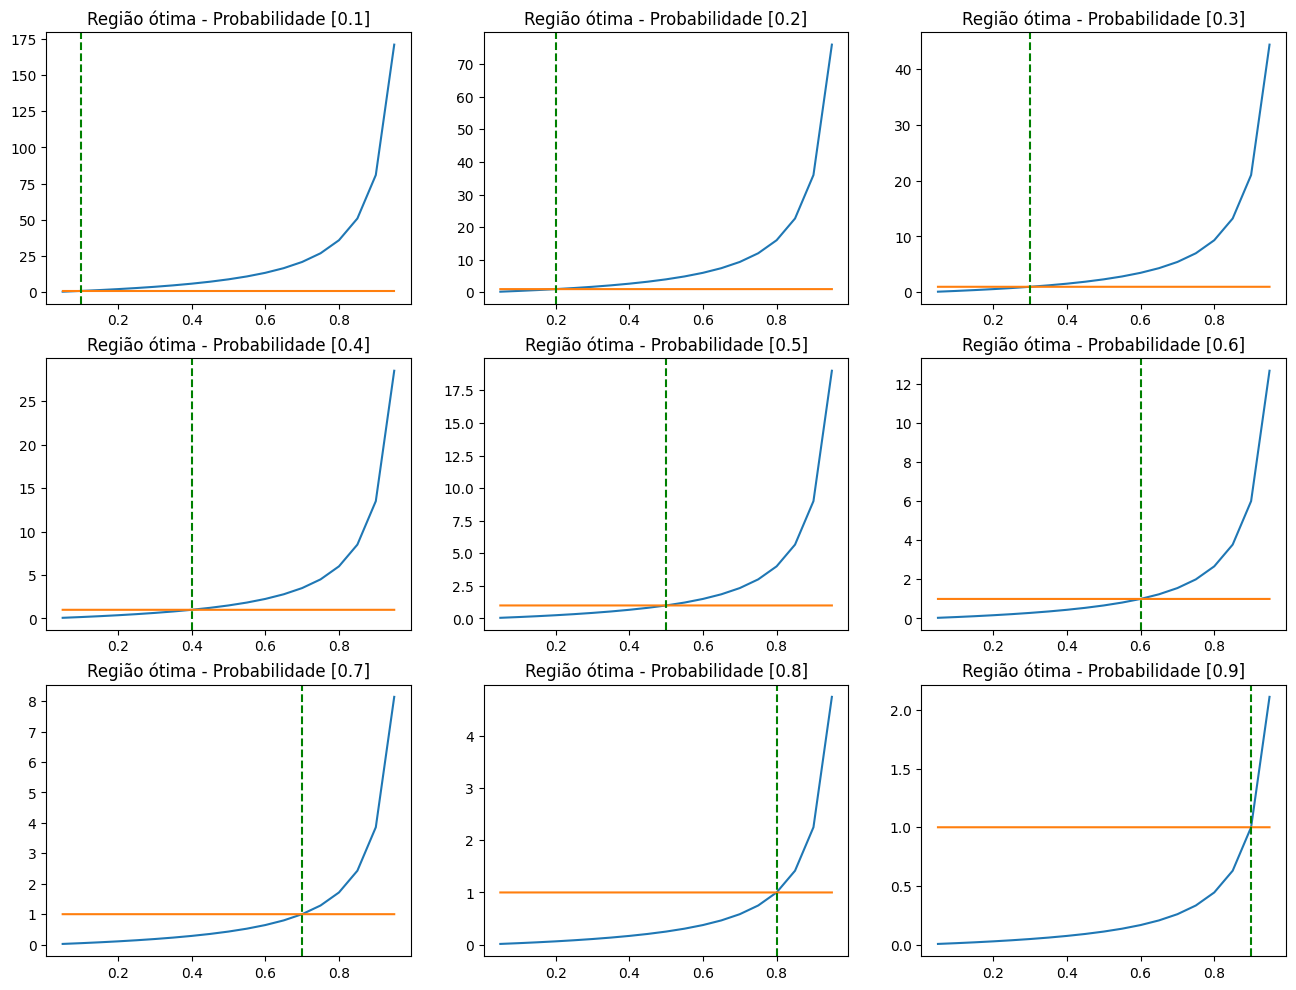

In [95]:
dict_curves = {}

min_max_k = [min(list_k_neg), max(list_k_pos)]

for k in min_max_k:
    if not _quiet: print(f'Processando k={k}')
    alpha = _pwl._get_alpha(k)
    gamma = 1
    dict_curves[k] = _ecc[nm_pwl_function].get_multi_empirical_limit_curve(c, list_p, k=k, gamma=gamma, alpha=alpha)

_cp.plot_curve_subplots_multiple_probabilities(dict_curves, list_p) 

## Polynomial Utility Function

$$
V(s) = 
$$

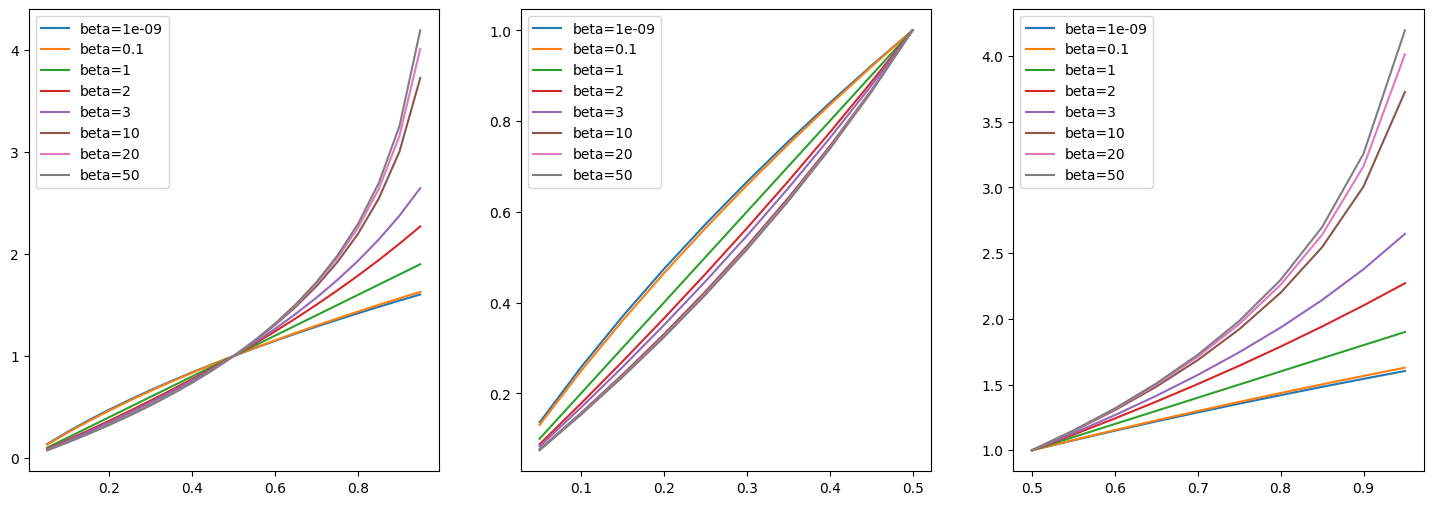

In [97]:
# Cria dicionario de curvas
dict_curves_poly = {}

# Processa para uma lista de betas
for beta in list_betas:
    if not _quiet: print(f'Processando beta={beta}')
    dict_curves_poly[beta] = _ecc[nm_polynomial_function].get_empirical_limit_curve(c, p, beta=beta, th=0.01)

# Cria dataframe com resultados
df_curves_poly = pd.DataFrame(dict_curves_poly)

# Realiza plot de cada beta
_cp.plot_curve_subplots(
    dict_curves=dict_curves_poly,
    filter_prob=0.5
)

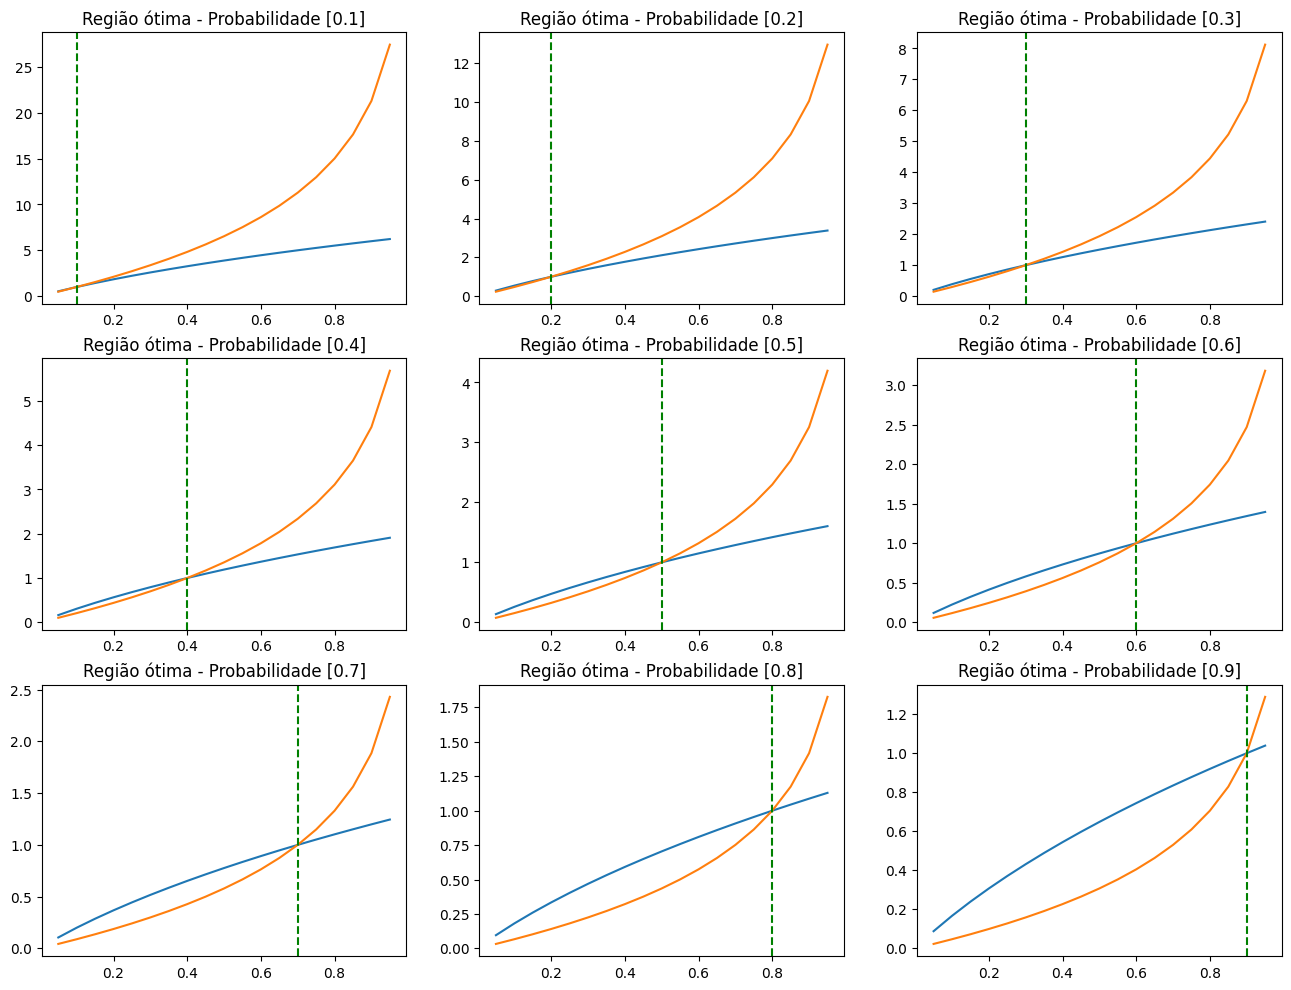

In [99]:
c = 1
list_p = np.arange(0.1, 1, 0.1)
dict_curves = {}

min_max_beta = [min(list_betas), max(list_betas)]

for beta in min_max_beta:
    if not _quiet: print(f'Processando beta={beta}')
    dict_curves[beta] = _ecc[nm_polynomial_function].get_multi_empirical_limit_curve(c, list_p, beta=beta, th=0.01)

_cp.plot_curve_subplots_multiple_probabilities(dict_curves, list_p) 

## VaR (Value at Risk)

## CVaR (Conditional Value at Risk)